# Preparing the Bell states.

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import array_to_latex
sim = Aer.get_backend("aer_simulator")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

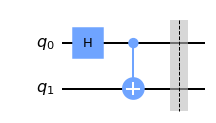

In [2]:
def prepareFirstBellState():
    c = QuantumCircuit(2) # 00
    c.h(0) # 00+01/sqrt(2)
    c.cx(0, 1) # 00 + 11/sqrt(2)
    c.save_statevector()
    return c
c = prepareFirstBellState()
c.draw("mpl")
s1 = sim.run(assemble(c)).result().get_statevector()

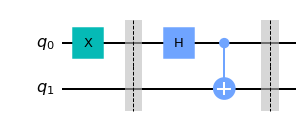

In [3]:
def prepareSecondBellState():
    c = QuantumCircuit(2) # 00
    c.x(0) # to get the - in Phi^-, 01
    c.barrier()
    c.h(0) # 00-01/sqrt(2)
    c.cx(0, 1) # 00 - 11/sqrt(2)
    c.save_statevector()
    return c
c = prepareSecondBellState()
c.draw("mpl")
s2 = sim.run(assemble(c)).result().get_statevector()

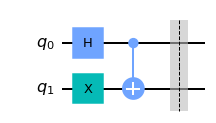

In [4]:
def prepareThirdBellState():
    c = QuantumCircuit(2) # 00
    c.h(0); c.x(1) # 10+11/sqrt(2)
    c.cx(0, 1) # 10+01/sqrt(2)
    c.save_statevector()
    return c
c = prepareThirdBellState()
c.draw("mpl")
s3 = sim.run(assemble(c)).result().get_statevector()

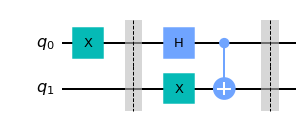

In [5]:
def prepareFourthBellState():
    c = QuantumCircuit(2) # 00
    c.x(0) # to help get the - in Psi^-, 01
    c.barrier()
    c.h(0); c.x(1) # 10-11/sqrt(2)
    c.cx(0, 1) # 10-01/sqrt(2)
    c.save_statevector()
    return c
c = prepareFourthBellState()
c.draw("mpl")
s4 = sim.run(assemble(c)).result().get_statevector()

In [6]:
array_to_latex(s1, prefix="\\Phi^+ = ")
array_to_latex(s2, prefix="\\Phi^- = ")    
array_to_latex(s3, prefix="\\Psi^+ = ") 
array_to_latex(s4, prefix="\\Psi^- = ")  

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Preparing the GHZ(n) state: 
The idea is to extend the first qubit's control over the second one (which we used in the Bell States) to being first qubit's control over each of the other n-1 bits.

In [7]:
def GHZ(n):
    c = QuantumCircuit(n)
    c.h(0) # first get the 0, 1 and the sqrt(2)
    for i in range(1, n): c.cx(0, i)
    c.save_statevector()
    return c

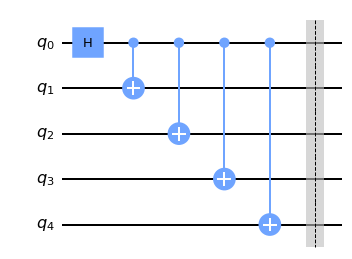

<IPython.core.display.Latex object>

In [9]:
# example usecase
n = 5
c = GHZ(n)
c.draw("mpl")
array_to_latex(sim.run(assemble(c)).result().get_statevector(), prefix="\\text{GHZ(" + str(n) + ") = }")